C:\Users\minzi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.225926
         Iterations 7
const                                  -1.334233
RevolvingUtilizationOfUnsecuredLines   -0.000043
age                                    -0.030936
NumberOfTime30-59DaysPastDueNotWorse    0.505759
NumberOfTimes90DaysLate                 0.476292
NumberOfTime60-89DaysPastDueNotWorse   -0.950023
dtype: float64


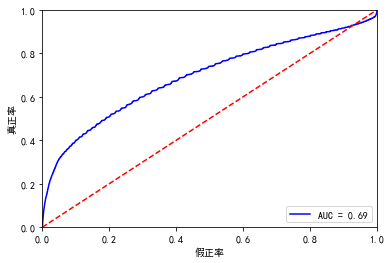

In [2]:
import pandas as pd
import matplotlib.pyplot as plt  # 导入图像库
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc

if __name__ == '__main__':
    matplotlib.rcParams['axes.unicode_minus'] = False
    data = pd.read_csv('cs-training.csv')
    Y = data['SeriousDlqin2yrs']
    X = data.drop(['SeriousDlqin2yrs', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
                   'NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
    X1 = sm.add_constant(X)
    logit = sm.Logit(Y, X1)
    result = logit.fit()
    print(result.params)

    test = pd.read_csv('cs-training.csv')
    Y_test = test['SeriousDlqin2yrs']
    X_test = test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
                        'NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
    X3 = sm.add_constant(X_test)
    resu = result.predict(X3)
    fpr, tpr, threshold = roc_curve(Y_test, resu)
    rocauc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rocauc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('真正率')
    plt.xlabel('假正率')
    plt.show()
